In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
from skimage.io import imread
import pylab

In [3]:
from skimage import img_as_float

In [4]:
from sklearn.cluster import KMeans

In [11]:
from sklearn.metrics import mean_squared_error


def _mse(x, x_pred, shape) -> float:   
    # https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Application_in_color_images
    _x, _y, _z = shape
    print(x == x_pred)
    return np.sum( (x - x_pred) ** 2 ) / (_x * _y * _z)


def _psnr(x, x_pred, shape, MAXi: float=1.0):
    MSE = _mse(x, x_pred, shape)
    print(MSE)
    return 10.0 * np.log10( (MAXi ** 2) / MSE)
    
    
def get_psnr(image_path: str='../data/parrots.jpg',
             nc: int=10,
             verbose: bool=False,
             show_image: bool=True,
             mode: str='mean'):
    if mode not in ('median', 'mean', ):
        raise ValueError(f'Incorrect mode {mode}. The acceptable values are [\'median\', \'mean\']')
    
    image = img_as_float( imread(image_path) )
        
    x, y, z = image.shape
    df = np.reshape(image, (x*y, z))

    clstr = KMeans(init='k-means++', random_state=241, n_jobs=-1, n_clusters=nc)
    
    clstr.fit(df)
    
    if verbose:
        print('Classes main colors:')
        print(clstr.cluster_centers_)
    
    lbln = np.array(clstr.labels_, dtype='int32')
    
    if verbose:
        print('Split statistic:')
        unique, counts = np.unique(lbln, return_counts=True)
        print( dict(zip(unique, counts)) )
    
    for cls in range(1, nc + 1):
        to_redraw_idxs = np.argwhere(lbln==cls).flatten()
        
        if mode == 'median':
            color = np.median( df[to_redraw_idxs] )
        else:
            # cluster_centers_ indexes started from 1
            color = clstr.cluster_centers_[cls - 1]
        
        df[to_redraw_idxs] = color
    
    img_redraw = np.reshape(df, (x, y, z) )
    
    if show_image:
        pylab.imshow(img_redraw)
    
    return _psnr(image, img_redraw, image.shape)
        

[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]
0.0


inf

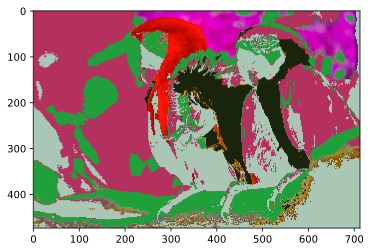

In [12]:
get_psnr('../data/parrots.jpg', nc=5, verbose=False, mode='mean', show_image=True)